In [295]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import uniform
from scipy.stats import poisson
from tabulate import tabulate

# Variable of Transformation

Drawing a random sample, $x$ from the uniform distribution, we van apply a variable of transformation, $u=f(x)$ to each data point, and analytically find the new probability distribution, $g(u)$.

#### Derive $g(u)$ Analytically for $u = x^2$ 
For a transformation of the p.d.f $f(x)=u$ to $g(u)$ by function $u(x)$, the relationship between the three functions in differential form is <br>
\begin{gather*}
    g(u)=f(x)+|\frac{dx}{du}| 
\end{gather*}
To solve for $g(u)$ given this relation and the function $u=e-x$, first express x in terms of u <br>
\begin{gather*}
    u=x^2 \\
    x=\sqrt{u}
\end{gather*}
Solving for $\frac{dx}{du}$ <br>
\begin{gather*}
    \frac{dx}{du}=\frac{d}{du}(\sqrt{u}) \\
    =\frac{d}{du}(u^\frac{1}{2}) \\
    =\frac{1}{2}u^\frac{-1}{2}
\end{gather*}
Thus, <br>
\begin{gather*}
    g(u)=u*\frac{1}{2}u^\frac{-1}{2} \\
    =\frac{\sqrt{u}}{2}
\end{gather*}


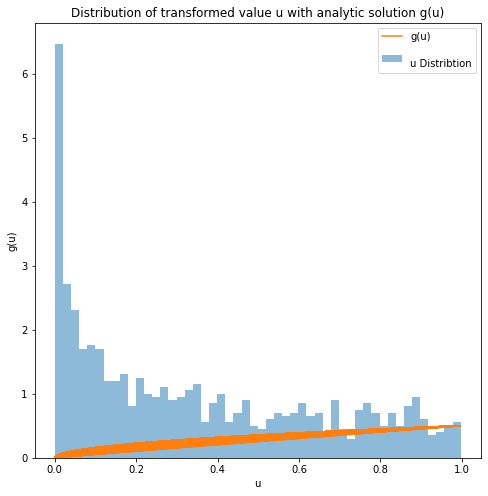

In [179]:
# u=x^2, g(u)=sqrt(u)/2
x = uniform.rvs(size=1000)

u = x ** 2
g = np.sqrt(u) / 2

def g(u):
    return np.sqrt(u) / 2

fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.title("Distribution of transformed value u with analytic solution g(u)")
plt.xlabel("u")
plt.ylabel("g(u)")

ax.hist(u, bins=50, density=True, alpha=0.5)
ax.plot(u, g(u))

ax.legend(["g(u)", '\nu Distribtion'])


#### Derive $g(u)$ Analytically for $u = e^x$ 
For a transformation of the p.d.f $f(x)=u$ to $g(u)$ by function $u(x)$, the relationship between the three functions in differential form is <br>
\begin{gather*}
    g(u)=f(x)+|\frac{dx}{du}| 
\end{gather*}
To solve for $g(u)$ given this relation and the function $u=e^x$, first express x in terms of u <br>
\begin{gather*}
    u=e^x \\
    x=\ln(u)
\end{gather*}
Solving for $\frac{dx}{du}$ <br>
\begin{gather*}
    \frac{dx}{du}=\frac{d}{du}\ln(u) \\
    =\frac{1}{u}
\end{gather*}
Thus, <br>
\begin{gather*}
    g(u)=u*\frac{1}{u} \\
    =\frac{u}{u} \\
    =1
\end{gather*}


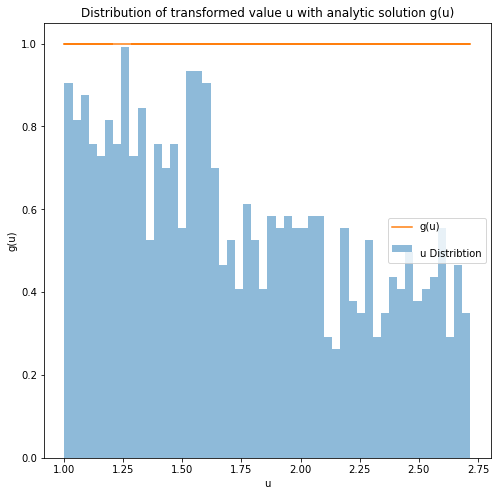

In [175]:
x = uniform.rvs(size=1000)
u = np.exp(x)

g = u / u

fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.title("Distribution of transformed value u with analytic solution g(u)")
plt.xlabel("u")
plt.ylabel("g(u)")
          
ax.hist(u, bins=50, density = True, alpha=0.5)
ax.plot(u, g)
ax.legend(["g(u)", '\nu Distribtion'])

# Throwing Two Dices

We can simulate a fair dice by drawing a random uniform distribution of x between 0 and 1. There are multiple ways to do so, e.g. multiply a random number x by 6, take the integer part of the number and add it by one 
([0,1]→[0,5]→[1,6]) 
or use numpy.random.uniform(). This number represents the face of the dice. We can repeat this procedure N times to simulate throwing the dice N times.

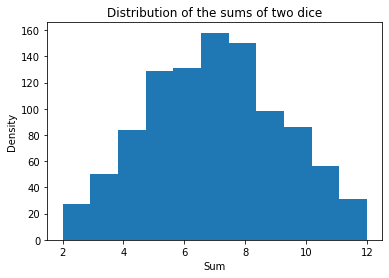

The variance of the sum distribution is 5.864951
The mean of the sum distribution is 7.007
The probability of Sevens is 0.158
The statistical uncertainty in the probability is 0.011534123287012324
The analytical probability of rolling a sum of 7 is sevens= 0.16666666666666666


In [311]:
def dice_rolls(dice, rolls):      
    return np.sum(np.random.randint(1,7,(dice,rolls)),axis=0)

sum_rolls = dice_rolls(2, 1000)

def dice_histogram(sum_rolls, bins):
    plt.hist(sum_rolls, bins)
    plt.xlabel('Sum')
    plt.title('Distribution of the sums of two dice')
    plt.ylabel("Density")
    plt.show()

dice_histogram(sum_rolls, 11)

variance = np.var(sum_rolls, axis=None)
mean = np.mean(sum_rolls, axis=None)

print("The variance of the sum distribution is", variance)
print("The mean of the sum distribution is", mean)

sevens_sum = np.count_nonzero(sum_rolls == 7)
p_sevens_ratio = sevens_sum / 1000
# the probability uncertainty is the standard error of the binomial proportion
uncertainty = np.sqrt((p_sevens_ratio * (1 - p_sevens_ratio)) / 1000)

print("The probability of Sevens is", p_sevens_ratio)
print("The statistical uncertainty in the probability is", uncertainty)

# Analytical
p_sevens_an = 6 * ((1 / 6) * (1 / 6))
print('The analytical probability of rolling a sum of 7 is sevens=', p_sevens_an)

Both probabilities gained by the simulation and analytically are very close, with the analytica solution falling within the range of probability+/statistical uncertainty by the simulation, showing the accuracy in our analytical solution.  

#  Central Limit Theorem
The central limit theorem states that the distribution of the sample mean 
¯
x
, 
¯
x
=
1
N
Σ
N
i
=
1
x
i
, of N variables 
x
i
 with finite variance 
σ
2
 in the limit 
N
→
inf
 will approach a normal distribution with variance 
σ
2
/
N
 independent of the form of the distribution f(x). In this computational experiment, we will test this theorem.

Generate a 5 event sample using built-in Poisson distributions in scipy with 
λ
=
2.0
. From these 5 events, calculate average 
μ
5
 and standard deviation 
σ
5
. Repeat tnis process N times. For each time, you will draw different set of 5 events, and calculate indepdent 
μ
5
 and 
σ
5
, respectively.

In [282]:
# N=10
# miu is 2

def Poisson(N):
    samples_avg = np.zeros(N, dtype=object)
    samples_variance = np.zeros(N, dtype=object)

    for i in range(N):
        sample = poisson.rvs(2, size=5)
        samples_avg[i] = np.mean(sample)
        samples_variance[i] = np.var(sample)
    # print(samples_avg, samples_variance)
    return (samples_avg, samples_variance)

def Poisson_dist(samples_avg, samples_variance, bins, N):
    fig, ax = plt.subplots(1,2)
    ax[0].hist(samples_avg, bins=bins, alpha=0.6)
    ax[1].hist(samples_variance, bins=bins, alpha=0.6)
    ax[0].set_title("Distribution of the Mean \nof N Five Event Samples")
    ax[0].set_xlabel('Mean')
    ax[1].set_title("Distribution of the Standard \nDeviation of N Five Event Samples")
    ax[1].set_xlabel('Standard Deviation')
    ax[0].set_ylabel('Density')
    A, V = Poisson(N)
    Dist1_mean = np.mean(A)
    Dist1_var = np.var(A)
    Dist2_mean = np.mean(V)
    Dist2_var = np.var(V)
    ax[0].legend(['mean='+ str(round(Dist1_mean,3)) + '\nvariance=' + str(round(Dist1_var,3))])
    ax[1].legend(['mean='+ str(round(Dist2_mean,3)) + '\nvariance=' + str(round(Dist2_var,3))])
    return 

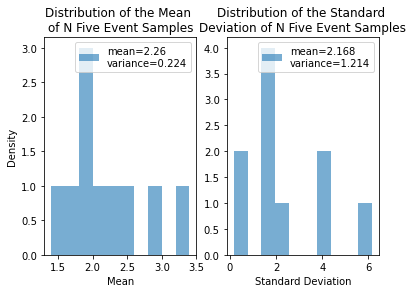

In [298]:
# N=10

A10, V10 = Poisson(10)

Dist1_mean = np.mean(A10)
Dist1_var = np.var(A10)

Dist2_mean = np.mean(V10)
Dist2_var = np.var(V10)

plt.show(Poisson_dist(A10, V10, 10, 10))



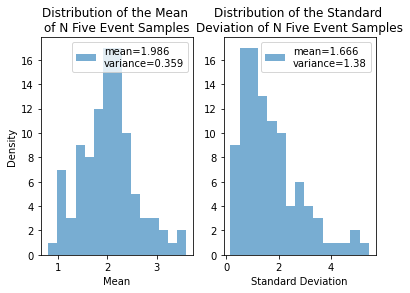

In [286]:
# N=100

A100, V100 = Poisson(100)
plt.show(Poisson_dist(A100, V100, 15, 100))

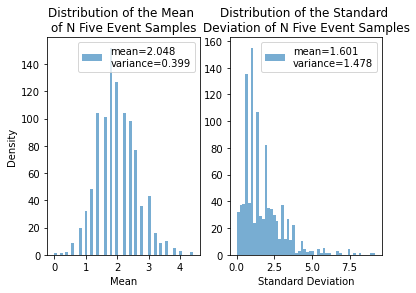

In [293]:
# N=1000

A1000, V1000 = Poisson(1000)
plt.show(Poisson_dist(A1000, V1000, 50, 1000))


We can see that as N gets larger, the distributions of the mean and standard deviation of the 5 event samples becomes more resembling of a normal distribution. Looking first at the distributions of the standard deviation of each 5 event sample for N samples, their variance increases as N increases, with corresponding values shown here:<br>
<table>
  <thead>
    <tr>
      <th>N</th>
      <th>Variance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>10</td>
      <td>1.674</td>
    </tr>
    <tr>
      <td>100</td>
      <td>1.38</td>
    </tr>
    <tr>
      <td>1000</td>
      <td>1.478</td>
    </tr>
  </tbody>
</table>

For the distributions of the mean of each 5 event sample for N samples, the variance does not appear to change with N and corresponding values for the mean distributions' variances are shown:
<table>
  <thead>
    <tr>
      <th>N</th>
      <th>Variance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>10</td>
      <td>0.448</td>
    </tr>
    <tr>
      <td>100</td>
      <td>0.359</td>
    </tr>
    <tr>
      <td>1000</td>
      <td>0.399</td>
    </tr>
  </tbody>
</table>


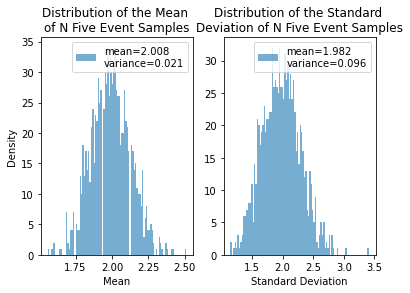

In [281]:
# N=1000 for a sample of M=100 events and lambda=2
def Poisson(N):
    samples_avg = np.zeros(N, dtype=object)
    samples_variance = np.zeros(N, dtype=object)

    for i in range(N):
        sample = poisson.rvs(2, size=100)
        samples_avg[i] = np.mean(sample)
        samples_variance[i] = np.var(sample)
    # print(samples_avg, samples_variance)
    return (samples_avg, samples_variance)

def Poisson_dist(samples_avg, samples_variance, N):
    fig, ax = plt.subplots(1,2)
    ax[0].hist(samples_avg, bins=100, alpha=0.6)
    ax[1].hist(samples_variance, bins=100, alpha=0.6)
    ax[0].set_title("Distribution of the Mean \nof N Five Event Samples")
    ax[0].set_xlabel('Mean')
    ax[1].set_title("Distribution of the Standard \nDeviation of N Five Event Samples")
    ax[1].set_xlabel('Standard Deviation')
    ax[0].set_ylabel('Density')
    A, V = Poisson(N)
    Dist1_mean = np.mean(A)
    Dist1_var = np.var(A)
    Dist2_mean = np.mean(V)
    Dist2_var = np.var(V)
    ax[0].legend(['mean='+ str(round(Dist1_mean,3)) + '\nvariance=' + str(round(Dist1_var,3))])
    ax[1].legend(['mean='+ str(round(Dist2_mean,3)) + '\nvariance=' + str(round(Dist2_var,3))])
    return 

A1000, V1000 = Poisson(1000)
plt.show(Poisson_dist(A1000, V1000, 1000))

With N=1000 and M=100, both distributions clearly represent a normal distribution. So although the number of samples increasing does cause the distribution of the sample mean to approach a normal distribtion, the number of events in each sample appears to affect the distribution. Looking more closely at the pairs of distributions representing N=1000 samples, the mean distributions appear to have a similar shape between M=5 and M=100 events. However, the distributions of the standard deviations of N=1000 samples seems to be more closely representative of a normal distribition for M=100 event samples than M=5 event samples. 

# Bonus
Generate 1000 samples. Each sample is a 10 event dataset using one built-in distribution in scipy but not Binomial, Normal nor Poisson. Show that the mean and variance of these 1000 samples also behave like a Normal Distribution.

In [146]:
from scipy.stats import bernoulli

def Bernoulli(N):
    bsamples_avg = np.zeros(N, dtype=object)
    bsamples_variance = np.zeros(N, dtype=object)

    for i in range(N):
        sample = bernoulli.rvs(0.2, size=10)
        bsamples_avg[i] = np.mean(sample)
        bsamples_variance[i] = np.var(sample)
    # print(samples_avg, samples_variance)
    return (bsamples_avg, bsamples_variance)


Text(0, 0.5, 'Density')

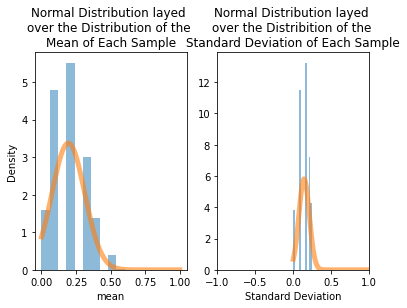

In [308]:
from scipy.stats import norm

bsamples_avg, bsamples_variance = Bernoulli(1000)

# avg and std of both distributions to compare to normal 

avg_dist_mean = np.mean(bsamples_avg)
avg_dist_std = np.std(bsamples_avg)
var_dist_mean = np.mean(bsamples_variance)
var_dist_std = np.std(bsamples_variance)


# norm_avg_samp = norm.rvs(loc = 3.0, scale = 0.01, size = 100000)
# norm_var_samp = norm.rvs(loc = var_dist_mean, scale = var_dist_std, size=1000)
x = np.linspace(0,1,100)

fig, ax = plt.subplots(1, 2)

plt.xlim(-1,1)

ax[0].hist(bsamples_avg, bins=10, density=True, alpha=0.5)
ax[0].plot(x, norm.pdf(x, loc=avg_dist_mean, scale=avg_dist_std), linewidth=5, alpha=0.6)
ax[1].hist(bsamples_variance, bins=10, density=True, alpha=0.5)
ax[1].plot(x, norm.pdf(x, loc=var_dist_mean, scale=var_dist_std), linewidth=5, alpha=0.6)

ax[0].set_title('Normal Distribution layed \nover the Distribution of the \nMean of Each Sample')
ax[1].set_title('Normal Distribution layed \nover the Distribition of the \nStandard Deviation of Each Sample')

ax[0].set_xlabel("mean")
ax[1].set_xlabel("Standard Deviation")

ax[0].set_ylabel("Density")

With the normal distribution layed over both distributions, we can see that both do approach a normal distribution by their shapes.